# 개별미션 풀이

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel('31_Data.xlsx')

In [3]:
df1.shape

(2575, 6)

In [4]:
df1.head(3)

관계                                          지속강화해야할행동  \
0  타인              -Very Supportive\n-Highly encouraging   
1  타인  Socializing and Networking with all employees ...   
2  타인                                         no comment   

                                      현재하고있지않지만해야할행동  \
0             - More Communication with team members   
1           Provide a System for further development   
2  Mr. Thiemig should be more time in 전술전략기획부 and...   

                                         더이상하지말아야할행동         직종 임원추천여부  
0                                              -None  경영/기획/컨설팅     추천  
1                                 Nothing to rCQBort  경영/기획/컨설팅     추천  
2  Not be on site at 전술전략기획부. Frequently attendan...      인사/총무    비추천

### 1번

In [9]:
df2 = df1.reset_index().melt(id_vars=['index','관계','직종','임원추천여부'])
df3 = df2.rename(columns={'index':'사원ID', 'variable':'항목','value':'TEXT'})
df3.shape

(7725, 6)

In [10]:
df3.head(3)

사원ID  관계         직종 임원추천여부         항목  \
0     0  타인  경영/기획/컨설팅     추천  지속강화해야할행동   
1     1  타인  경영/기획/컨설팅     추천  지속강화해야할행동   
2     2  타인      인사/총무    비추천  지속강화해야할행동   

                                                TEXT  
0              -Very Supportive\n-Highly encouraging  
1  Socializing and Networking with all employees ...  
2                                         no comment

### 2번

In [11]:
df3['항목'].value_counts()

항목
지속강화해야할행동         2575
현재하고있지않지만해야할행동    2575
더이상하지말아야할행동       2575
Name: count, dtype: int64

In [13]:
cond1 = (df3['항목']=='지속강화해야할행동')
df4=df3.loc[cond1]
df4.head(3)

사원ID  관계         직종 임원추천여부         항목  \
0     0  타인  경영/기획/컨설팅     추천  지속강화해야할행동   
1     1  타인  경영/기획/컨설팅     추천  지속강화해야할행동   
2     2  타인      인사/총무    비추천  지속강화해야할행동   

                                                TEXT  
0              -Very Supportive\n-Highly encouraging  
1  Socializing and Networking with all employees ...  
2                                         no comment

In [14]:
import konlpy
from konlpy.tag import Okt

In [15]:
okt = Okt()

In [18]:
df_N = pd.DataFrame(okt.nouns(df4['TEXT'].values.tolist()[20]))

In [27]:
text_series = df4['TEXT'].dropna().reset_index()['TEXT']

In [28]:
df_N = pd.DataFrame() # 명사를 집어 넣을 데이터 프레임 구성
for i in range(0,len(text_series)):
    dfn = pd.DataFrame(okt.nouns(text_series[i]))
    df_N = pd.concat([df_N, dfn])

In [29]:
df_N

0
0      및
1     본사
2     협업
3     강화
4      매
..   ...
4     대한
5     격려
6      및
7   자기계발
8     부여

[17138 rows x 1 columns]

### 3

In [30]:
df3['항목'].unique()

array(['지속강화해야할행동', '현재하고있지않지만해야할행동', '더이상하지말아야할행동'], dtype=object)

In [31]:
cond1 = df3['항목']=='현재하고있지않지만해야할행동'
df5 = df3.loc[cond1]['TEXT'].dropna().reset_index()
text_series2 = df5['TEXT']
len(text_series2)

2546

In [32]:
df_N = pd.DataFrame() # 명사를 집어 넣을 데이터 프레임 구성
for i in range(0,len(text_series2)):
    dfn = pd.DataFrame(okt.nouns(text_series2[i]))
    df_N = pd.concat([df_N, dfn])

In [34]:
# 불용어 처리
df_stopword = pd.read_csv('stopword.txt')

In [36]:
# 불용어 리스트
stopword_list = df_stopword['불용어'].tolist()
# 불용어 리스트에 없는 값만 추출
clean_N = [x for x in df_N[0].tolist() if x not in stopword_list]

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

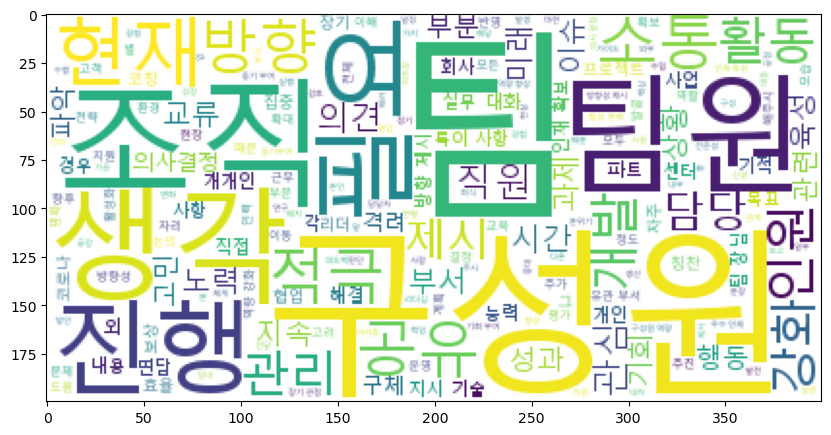

In [43]:
wc = WordCloud(background_color='white',
               font_path='malgun.ttf').generate(' '.join(pd.Series(clean_N)))
plt.figure(figsize=[10,10])
plt.imshow(wc)
plt.show()

### 4

In [44]:
df3['직종'].unique()

array(['경영/기획/컨설팅', '인사/총무', '전문직', 'IT/인터넷', '유통/무역', '금융/재무', '디자인',
       '서비스/고객지원', '마케팅/시장조사', '영업/제휴', '생산관리/품질관리', '미디어/홍보', '기타',
       '기획/경영', '특수계층/공공', '개발', '데이터', '법률/법무', '연구개발', '교육', '정책/전술'],
      dtype=object)

In [45]:
cond1 = (df3['직종']=='정책/전술')
df6 = df3.loc[cond1]['TEXT'].dropna().reset_index()
text_series3 = df6['TEXT']

In [46]:
df_N = pd.DataFrame()
for i in range(0, len(text_series3)):
    dfn = pd.DataFrame(okt.nouns(text_series3[i]))
    df_N = pd.concat([df_N, dfn])

In [47]:
clean_N2 = [x for x in df_N[0].tolist() if x not in stopword_list]

In [50]:
p1 = pd.Series(clean_N2).value_counts().head(10)

In [51]:
import plotly.express as px

In [52]:
px.bar(p1)

### 5

----

# 단어 표현(Word Representation)

- One Hot Encoding : 문장의 모든 단어를 1/0로 표현
- Continuous Bag of Wirds (CBOW) : 문서 내 모든 단어의 빈도 수를 Matrix로 표현
- Skip-Gram : 중심 단어로부터 주변 단어를 Matrix 형태로 바꿔 표현/예측

In [53]:
with open('data3.txt','r',encoding='utf-8') as file:
    text1 = file.read()

In [54]:
text1

'공개출처정보, 오픈소스 인텔리전스(영어: Open-source intelligence), 간단히 오신트(OSINT)는 공개된 출처에서 얻은 정보들을 말한다.\n\nCIA 등 국립정보기관이나 민간정보회사에서 수집하는 정보의 종류는 인간정보(HUMINT, 휴민트), 신호정보(SIGINT, 시긴트), 영상정보(IMINT, 이민트), 측정정보(MASINT, 매신트), 공개출처정보(OSINT, 오신트), 기술정보(TECHINT, 테킨트) 등이 있다. 원래 CIA는 휴민트가 중심이었으나, 오늘날에는 컴퓨터의 발달로 테킨트의 중요성이 급부상했다.\n\n인터넷이 없던 수백년 전부터, 민간에서 오신트 분석기관으로 유명한 것은 언론사와 대학교, 기자와 학자이다. 21세기 오늘날에는 컴퓨터와 인터넷의 개발로 오신트가 굉장히 많아졌다. 흔히들 "오늘날은 정보의 홍수 시대"라고 말할 때 그 정보는 공개출처정보, 즉 오신트를 의미한다.\n\n2001년 비영리로 오신트를 수집, 분석, 공개하는 단체인 위키백과 사이트가 미국에 설립되었다. 2011년 기준으로, 인터넷상에서 세계 최대의 민간 비영리 오신트 수집 분석 공개 사이트이다.\n\n2005년 11월 1일, 미국은 국가정보국 산하에 오신트를 수집, 분석, 공개하는 오픈소스센터를 설립했다.\n\n2006년 4월, 위키백과의 소프트웨어와 인터페이스를 그대로 사용하며, 구글이 서버를 개발하여 미국 CIA에 인텔리피디아 사이트가 설립되었다. 위키백과와의 차이로, 기밀취급인가 등급에 따라 사용할 수 있는 정보를 차단할 수 있게 하였다.\n\n2012년 대한민국 통일부는 북한에 대한 오신트를 수집, 분석, 공개하는 북한공개정보센터(가칭)를 설립할 계획이다.\n\n모든 첩보활동이 하이테크 기술이나 첩보원에 의존하는 것은 아니며, 방대한 양의 첩보가 지금도 신문을 정독하는 등의 공개출처정보에서 얻어진다.\n\n제임스 울시 CIA 국장은 “모든 정보의 95%는 공개된 출처에서, 나머지 5%만이 비밀 출처에서 나온다”고 말했다. 즉, 비밀 보고서 하

In [55]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [59]:
sent1 = [okt.nouns(x) for x in sent_tokenize(text1)] # 문장만 추출
# 리스트 컴프리헨션 추가 -> 각 문장의 명사들만 뽑아옴

In [60]:
from gensim.models import Word2Vec

In [61]:
model = Word2Vec(sent1, vector_size=100, window=5, min_count=1, sg=1)

In [62]:
# 유사 단어 찾기
model.wv.most_similar('정보')

[('급부', 0.30838295817375183),
 ('오늘날', 0.24046805500984192),
 ('전송', 0.23905633389949799),
 ('정독', 0.2289428412914276),
 ('분석', 0.2222423106431961),
 ('정말', 0.21999025344848633),
 ('종류', 0.21993805468082428),
 ('다른', 0.2017812877893448),
 ('그대로', 0.19312016665935516),
 ('트', 0.1849009096622467)]

# Skip-Gram with Negative Sampling(SGNS)

- 기존의 Skip-Gram 방시은 중심 단어로부터 주변 단어를 Vector 만들어 처리 모델
- 단어 표현이 많아지게 되는 경우엔 계산 비용이 매우 높아짐
- SGNS 모델은 중심단어와 주변단어 모두를 이용하여, 특정 범위 내 해당 단어가 모두 존재하는지를 확률로 예측하는 모델을 구성
    - 소수의 단어를 무작위로 선택해 모델 중심 단어로부터 얼마나 해당 단어들이 구분되는지를 학습
    - 매우 큰 데이터 셋에 대해 효율성이 높음

In [64]:
with open('data2.txt','r',encoding='utf-8') as file:
    text2 = file.read()

In [69]:
# 불용어 추가
stopword_list.append('즉')

In [71]:
# 문장분리
sent2 = [[y for y in okt.nouns(x) if y not in stopword_list] for x in sent_tokenize(text2)]

In [72]:
model = Word2Vec(sent2, vector_size=100, window=5,
                 min_count=1,sg=1, negative=5)

In [73]:
model.wv.most_similar('문제')

[('당장', 0.2914324998855591),
 ('삶', 0.23107638955116272),
 ('대응', 0.22581647336483002),
 ('모멘텀', 0.21996302902698517),
 ('방법', 0.21027591824531555),
 ('상황', 0.19982095062732697),
 ('구출', 0.1746312826871872),
 ('확산', 0.1723463386297226),
 ('화', 0.16102628409862518),
 ('통제', 0.1490509808063507)]

# Term Frequency Inverse Document Frequency(TF-IDF)

- CBOW 기법을 보완하기 위해, 개별 문서나 문장에서 자주 나타나는 단어에 가중치를 두고, 전체적으로 많이 등장하는 단어에는 패널티를 부여해 단어를 표현
- 특정 문장에서 많이 등장하는 단어는 중요한 단어가 되지만, 다른 문장에서도 해당 단어가 많이 사용된다면, 범용적으로 사용되는 단어거나, 전체 글을 관통하는 주제어일 가능성이 높음
- 가중치를 이용해 범용적으로 사용되는 단어는 제한하고, 강조되는 단어를 찾아내 텍스트 마이닝을 수행할 시 높은 성능을 발휘

In [76]:
sent3 = sent_tokenize(text2)

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
vector_model1 = CountVectorizer()
x = vector_model1.fit_transform(sent3)

In [87]:
m1 = pd.DataFrame(data=x.toarray(),columns=vector_model1.get_feature_names_out())
m1

2가지  3가지  action  close  combat  cqc  defined  ill  momentum  of  ...  \
0     0    0       0      0       0    0        0    0         0   0  ...   
1     0    0       0      0       0    0        0    0         0   0  ...   
2     0    0       0      0       0    0        0    0         0   0  ...   
3     0    0       0      0       0    0        0    0         0   0  ...   
4     0    0       0      1       1    1        0    0         0   0  ...   
5     0    0       0      0       0    0        0    0         0   0  ...   
6     0    0       0      0       0    0        0    0         0   0  ...   
7     0    0       0      0       0    0        0    0         1   0  ...   
8     0    1       1      0       0    0        0    0         0   1  ...   
9     0    0       0      0       0    0        0    0         1   0  ...   
10    0    0       0      0       0    0        0    0         0   0  ...   
11    1    0       0      0       0    0        0    0         0   0  ...   
12    0    0       0      0       0    0        2    1         0   0  ...   
13    0    0       0      0       0    0        0    0         0   0  ...   
14    0    0       0      0       0    0        0    0         0   0  ...   
15    0    0       0      0       0    0        0    0         0   0  ...   
16    0    0       0      0       0    0        0    0         0   0  ...   
17    0    0       0      0       0    0        0    0         0   0  ...   
18    0    0       0      0       0    0        0    0         0   0  ...   
19    0    0       0      0       0    0        0    0         0   0  ...   
20    0    0       0      0       0    0        0    0         0   0  ...   
21    0    0       0      0       0    0        0    0         0   0  ...   
22    0    0       0      0       0    0        0    0         0   0  ...   
23    0    0       0      0       0    0        0    0         0   0  ...   
24    0    0       0      0       0    0        0    0         0   0  ...   
25    0    0       0      0       0    0        0    0         0   0  ...   
26    0    0       0      0       0    0        0    0         0   0  ...   
27    0    0       0      0       0    0        0    0         0   0  ...   
28    0    0       0      0       0    0        0    0         0   0  ...   
29    0    0       0      0       0    0        0    0         0   0  ...   
30    0    0       0      0       0    0        0    0         0   0  ...   
31    0    0       0      0       0    0        0    0         0   0  ...   
32    0    0       0      0       0    0        0    0         0   0  ...   
33    0    0       0      0       0    0        0    0         0   0  ...   
34    0    0       1      0       0    0        0    0         0   1  ...   
35    0    0       0      0       0    0        0    0         0   0  ...   

    행동에  행동을  행동이다  행동하지  화력을  화력투사  확산되기  확산되지  확장되는  확장되지  
0     0    0     0     0    0     0     0     0     0     0  
1     0    0     0     0    0     0     0     0     0     0  
2     0    0     0     1    0     0     0     0     0     0  
3     0    0     0     0    0     0     0     0     0     0  
4     0    0     0     0    0     0     0     0     0     0  
5     0    0     0     0    0     0     0     0     0     0  
6     0    0     0     0    0     0     0     0     0     0  
7     0    0     0     0    1     0     0     0     0     0  
8     0    0     0     0    0     0     0     0     0     0  
9     0    0     0     0    0     0     0     0     0     0  
10    0    0     0     0    0     0     0     0     0     0  
11    0    0     0     0    0     0     0     0     0     0  
12    0    0     0     0    0     0     0     0     0     0  
13    0    0     0     0    0     0     0     0     0     0  
14    0    0     0     0    0     0     0     0     0     0  
15    0    0     0     0    0     0     0     0     0     0  
16    0    0     0     0    0     0     0     0     0     0  
17    0    0     0     0    0     0   

In [88]:
# TF-IDF
vector_model2 = TfidfVectorizer()
x = vector_model2.fit_transform(sent3)

In [89]:
m1 = pd.DataFrame(data=x.toarray(),columns=vector_model2.get_feature_names_out())
m1

2가지       3가지    action     close    combat       cqc   defined  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.252368  0.252368  0.252368  0.000000   
5   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.199277  0.178653  0.000000  0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.386302  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
12  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.441163   
13  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
18  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
25  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
28  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
30  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
31  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
33  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34  0.000000  0.000000  0.297708  0.000000  0.000000  0.000000  0.000000   
35  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         ill  momentum        of  ...       행동에       행동을      행동이다     행동하지  \
0   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
1   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.36305   
3   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
4   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
5   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
6   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
7   0.000000  0.240061  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
8   0.000000  0.000000  0.178653  ...  0.000000  0.000000  0.000000  0.00000   
9   0.000000  0.210039  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
10  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
11  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
12  0.220581  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000   
13  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.00000

# 문장 표현(Sentence Representation)

- 텍스트 분류 및 연관 분석 등 텍스트 마이닝 기법을 사용하기 위해, 문장 단위로 자연어를 처리하여 표현하는 방법
    - Text to Sequence
        - 문장 내 단어들을 하나의 정수와 매칭시켜 한 문장을 여러 개의 정수로 구성
        - 컴퓨터가 자체적으로 갖는 단어 사전을 구축하여, 문장 내 각 단어들의 위치 정보를 구축하는 작업
    - Padding
        - 텍스트 길이에 따라 Vector(Sequence)의 크기가 달라지게 되는데, 이를 방지하기 위해서 가장자리를 0값으로 채워주는 (Zero Padding)방법

In [91]:
df7 = df3.dropna()

In [96]:
df7['Target'] = df7['임원추천여부'].replace('추천',1).replace('비추천',0)
df7['Target'].value_counts()

/var/folders/q9/51yx3nc91mq6crjc81y6g1wm0000gn/T/ipykernel_40622/2739109763.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Target
1    5821
0    1820
Name: count, dtype: int64

In [97]:
Y = df7['Target']
X = df7['TEXT']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=1234)

In [105]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
# 사용자가 만든 함수를 Scikit learn 파이프라인 내에서 사용할 수 있도록 변환
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [117]:
# 자연어 처리 함수 구성 (Text2Seq/ Padding)
def text_preprocessing(X):
    text_to_seq = Tokenizer(num_words=10000)
    text_to_seq.fit_on_texts(X)
    sequence1 = text_to_seq.texts_to_sequences(X)
    return pad_sequences(sequence1, maxlen=30)

In [118]:
text_transformer = FunctionTransformer(text_preprocessing)
text_transformer

FunctionTransformer(func=<function text_preprocessing at 0x2c13fb6a0>)

In [119]:
pipe_model = make_pipeline(text_transformer, MinMaxScaler(), SVC())

In [121]:
grid_model = GridSearchCV(pipe_model, param_grid={},
                          cv=3, scoring='f1', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

In [126]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14      1290
           1       0.77      1.00      0.87      4058

    accuracy                           0.78      5348
   macro avg       0.89      0.54      0.51      5348
weighted avg       0.83      0.78      0.70      5348

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       530
           1       0.77      1.00      0.87      1763

    accuracy                           0.77      2293
   macro avg       0.38      0.50      0.43      2293
weighted avg       0.59      0.77      0.67      2293



/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [129]:
# 새로운 값 입력
new_data = input()
input_data = pd.DataFrame(data=[new_data], columns=['TEXT'])
input_data

회사의 협력적 관계에 가장 중요한 건, 팀워크 입니다만?


TEXT
0  회사의 협력적 관계에 가장 중요한 건, 팀워크 입니다만?

In [131]:
best_model.predict(input_data) # 추천으로 분류함(1이 추천)

array([1])

# 개별미션

- 아래의 미션을 Jupyter Notebook으로 풀이 후, [File] - [Download as]에 [HTML (.html] 로 저장하여 메일로 송부해주세요.
- 제출 양식 : [하나은행_데이터] Call_Name_정보 작전1 (12주차 2일)
- 아래 데이터는 “DS 정보 분석 팀”이 제공한 국방/외교 관련 모 신문사의 기사 데이터이다.
-----

국방부 산하 **“DS 정보 분석 전략팀”**에서 국내 군과 외교, 금융 관련한 작전을 바탕으로 **“하나로 디지털 팀”**에게 데이터 분석 의뢰를 요청하였습니다.  

 **“DS 정보 분석 팀”**은 현재 국제적으로 문제가 되고 있는 ‘불법항정신성의약품 유통’과 관련하여, 국내 여러 금융 지표(통화량, 금리, 거래 등)에 대해 치명적인 변동사항이 있는지 확인하는 것이 팀의 작전 목적 입니다. 

 이번 작전은 2020년도에 발생했던 한국 ‘외교’관련한 이슈들과, 현재 ‘외교’ 이슈들을에 대한 미디어 매체의 보도자료를 모니터링하여, 특정 사항에 대한 엠바고(Pree Embargo)를 언론사가 명확히 지키고 있는지 확인하려고 합니다.  

 또한 현재 모 언론사에 엠바고 사항이 명확히 전달 되지 않아, 특정 사건에 대한 보도가 발생 할 수 있다는 첩보를 **“DS정보분석”**팀으로부터 전달 받았습니다.

이에 “하나로 디지털 팀”은 OSINT(공개출처정보)중 하나인 언론 기사에 대해 ‘수동적 수집’을 통한 첩보 및 정보 제공을 수행하기로 했습니다.

**DS 정보 분석 팀 요청 사항** 

1. 일전에 수집 된 (2020년) 모 언론사의 뉴스 기사 데이터를 이용하여,  ‘전략자산’과 관련한 다양한 주제들에 대한 확인이 필요하며, 속보 자료에 대한 보도내용 확인 필요
2. 현재 ‘외교’와 ‘금융’관련한 자료에 “한국 경제” 신문사에 요청한 엠바고가 잘 수행되고 있는지에 대한 확인 필요 
3. 데이터 마이닝을 활용하여, 특정 수집 기사에 대한 ‘외교’ / ‘금융’ 관련 카테고리 분류 모델 필요
4. 지속적 OSINT 정보 확인을 위한, 데이터 수집 방안 설계 필요

위의 4가지 요청 사항에 대해, 

“하나로 데이터 팀” 데이터 분석 요원들은 아래의 6가지에 대한 분석을 수행하고, 지속적 보도 자료 모니터링 (데이터 수집 처리 방안)에 대한 아이디어를 제시해 주세요.

In [134]:
df1 = pd.read_csv('32_Data.csv')

----

1. '내용'에서 불용어(stopword.txt 파일을 이용)를 처리한 뒤, 각 문장 별로 명사만 추출하여 Skip Gram을 활용해, '전략’과 ’자산'와 가장 유사도가 높은 단어를 찾으시오.

In [141]:
from konlpy.tag import Okt
from gensim.models import Word2Vec

In [142]:
df1['내용']

0     우리 정부는 21일 군함도(원명 하시마·端島) 등 일본 근대산업시설 23곳에 대한 ...
1     존 볼턴 전 백악관 국가안보보좌관은 회고록에서 북한 김영철 노동당 부위원장이 했던 ...
2     작년 6월 30일 오후 판문점 자유의집 앞에서 남·북·미 3자 정상이 만났다. 그런...
3                                                 /연합뉴스
4     정경두 국방부장관이 지난해 7월 24일 서울 용산구 국방부를 찾은 존 볼턴 미국 국...
                            ...                        
84    정부는 16일 북한의 개성 연락사무소 폭파에 "예고됐던 도발"이라고 했다. 그러나 ...
85    북한이 16일 오후 2시 50분 개성공단 내 남북공동연락사무소를 폭파했다. 김정은 ...
86    통일부는 16일 15시 40분쯤 개성 남북공동연락사무소에 대한 전기공급을 중단했다고...
87                       [속보] 軍, 대북감시 대비태세 강화.. 지휘관 정위치
88                                 외통위 나서는 김연철 장관 /연합뉴스
Name: 내용, Length: 89, dtype: object

In [136]:
with open('stopword.txt', 'r', encoding='utf-8') as f:
    stop_words = f.read().splitlines()

In [137]:
stop_words

['불용어',
 '수',
 '위',
 '것',
 '업무',
 '대한',
 '국',
 '및',
 '차',
 '깨',
 '관',
 '안',
 '며',
 '데',
 '것',
 '우리',
 '박',
 '고',
 '면',
 '채',
 '장',
 '부',
 '측',
 '두',
 '로',
 '개',
 '보',
 '꽤',
 '함',
 '오',
 '대해',
 '일',
 '등',
 '점',
 '위해',
 '지금',
 '앞',
 '내',
 '좀',
 '더',
 '타',
 '통해',
 '개선',
 '때',
 '비',
 '알',
 '좀더',
 '조금',
 '간',
 '못',
 '를',
 '을',
 '통한',
 '분',
 '감',
 '후',
 '전',
 '은',
 '는',
 '이',
 '가',
 '음',
 '자',
 '중',
 '속',
 '시',
 '도',
 '']

In [144]:
# 명사추출 함수 정의
def extract_nouns(text):
    okt = Okt()
    nouns = okt.nouns(text)
    return [word for word in nouns if word not in stop_words]

In [147]:
df1['내용'] = df1['내용'].fillna('')

In [148]:
# '내용'에서 명사만 추출하여 리스트로 저장
content_list = df1['내용'].apply(extract_nouns).tolist()

In [149]:
# Skip Gram 모델 학습
model = Word2Vec(sentences=content_list,
                window=5, sg=1, min_count=1)

In [150]:
# '전략'
model.wv.most_similar('전략', topn=5)

[('문제', 0.9971823692321777),
 ('한국', 0.9971707463264465),
 ('북한', 0.9970873594284058),
 ('정부', 0.9967448711395264),
 ('미국', 0.996694028377533)]

In [151]:
# '자산'
model.wv.most_similar('자산', topn=5)

[('재개', 0.9949559569358826),
 ('훈련', 0.9947832226753235),
 ('전개', 0.9944758415222168),
 ('한국', 0.99445641040802),
 ('날', 0.9944198727607727)]

----

2. 기사 제목으로부터 '속보'와 '단독'보도에 해당하는 기사만 추출하여, 해당 기사 내용에 가장 많이 등장한 명사 5가지를 확인하고, 가장 많이 등장한 단어와 유사한 단어를 전체 기사 내용에서 찾으시오. (불용어 제거)

In [154]:
from collections import Counter

In [153]:
df1['기사제목']

0                   정부, 유네스코에 日군함도 세계유산 취소 요구
1           "트럼프, 하노이 회담후 김정은에 北까지 데려다주겠다 제안"
2     [단독] "美北 판문점 회동때, 트럼프도 김정은도 文동행 원치 않았다"
3             [단독] "트럼프와 회담, 김정은이 아닌 정의용이 제안"
4       [단독] "트럼프 '한국 방위비 분담금' 미군철수로 위협하라 지시"
                       ...                   
84            文대통령은 NSC 불참… 통일장관은 "北도발 예고된 일"
85                         文정부 남북화해 상징이 폭파당했다
86                       [속보]개성 연락사무소 전기공급 중단
87             [속보] 軍, 대북감시 대비태세 강화.. 지휘관 정위치
88                김연철 통일부 장관 "북한의 폭파, 예고된 부분"
Name: 기사제목, Length: 89, dtype: object

In [155]:
news_titles = df1['기사제목']
news_titles2 = [title for title in news_titles if '속보' in title or '단독' in title]

In [156]:
# '속보'와 '단독' 보도 기사 합치기
combined_text = ' '.join(news_titles2)

In [167]:
# 명사만 추출
okt = Okt()
nouns = okt.nouns(combined_text)
# 불용어 제거(속보,단독도 추가 불용어에)
stop_words.append('속보')
stop_words.append('단독')
filtered_nouns = [word for word in nouns if word not in stop_words]

In [165]:
Counter(filtered_nouns).most_common(5)

[('트럼프', 4), ('김정은', 3), ('판문점', 2), ('동행', 2), ('회', 1)]

In [166]:
# 전체 기사 내용에서 가장 많이 등장한 단어와 유사한 단어 찾기
model = Word2Vec(sentences=[filtered_nouns], vector_size=100, window=5, sg=1, min_count=1)

# 가장 많이 등장한 단어
model.wv.most_similar('트럼프', topn=5)

[('신포', 0.2218819409608841),
 ('유엔안보리', 0.217154860496521),
 ('훈련소', 0.20014579594135284),
 ('철', 0.16932910680770874),
 ('강화', 0.1517784595489502)]

----

3. '한국 경제' 신문사의 뉴스 기사 검색에서, '외교'에 해당하는 기사 20페이지를(약 180개) 수집하고, '경제'에 해당하는 기사 20페이지를 수집하여 아래와 같은 데이터 프레임을 구성하시오.
https://search.hankyung.com/search/news?query=외교&page=1
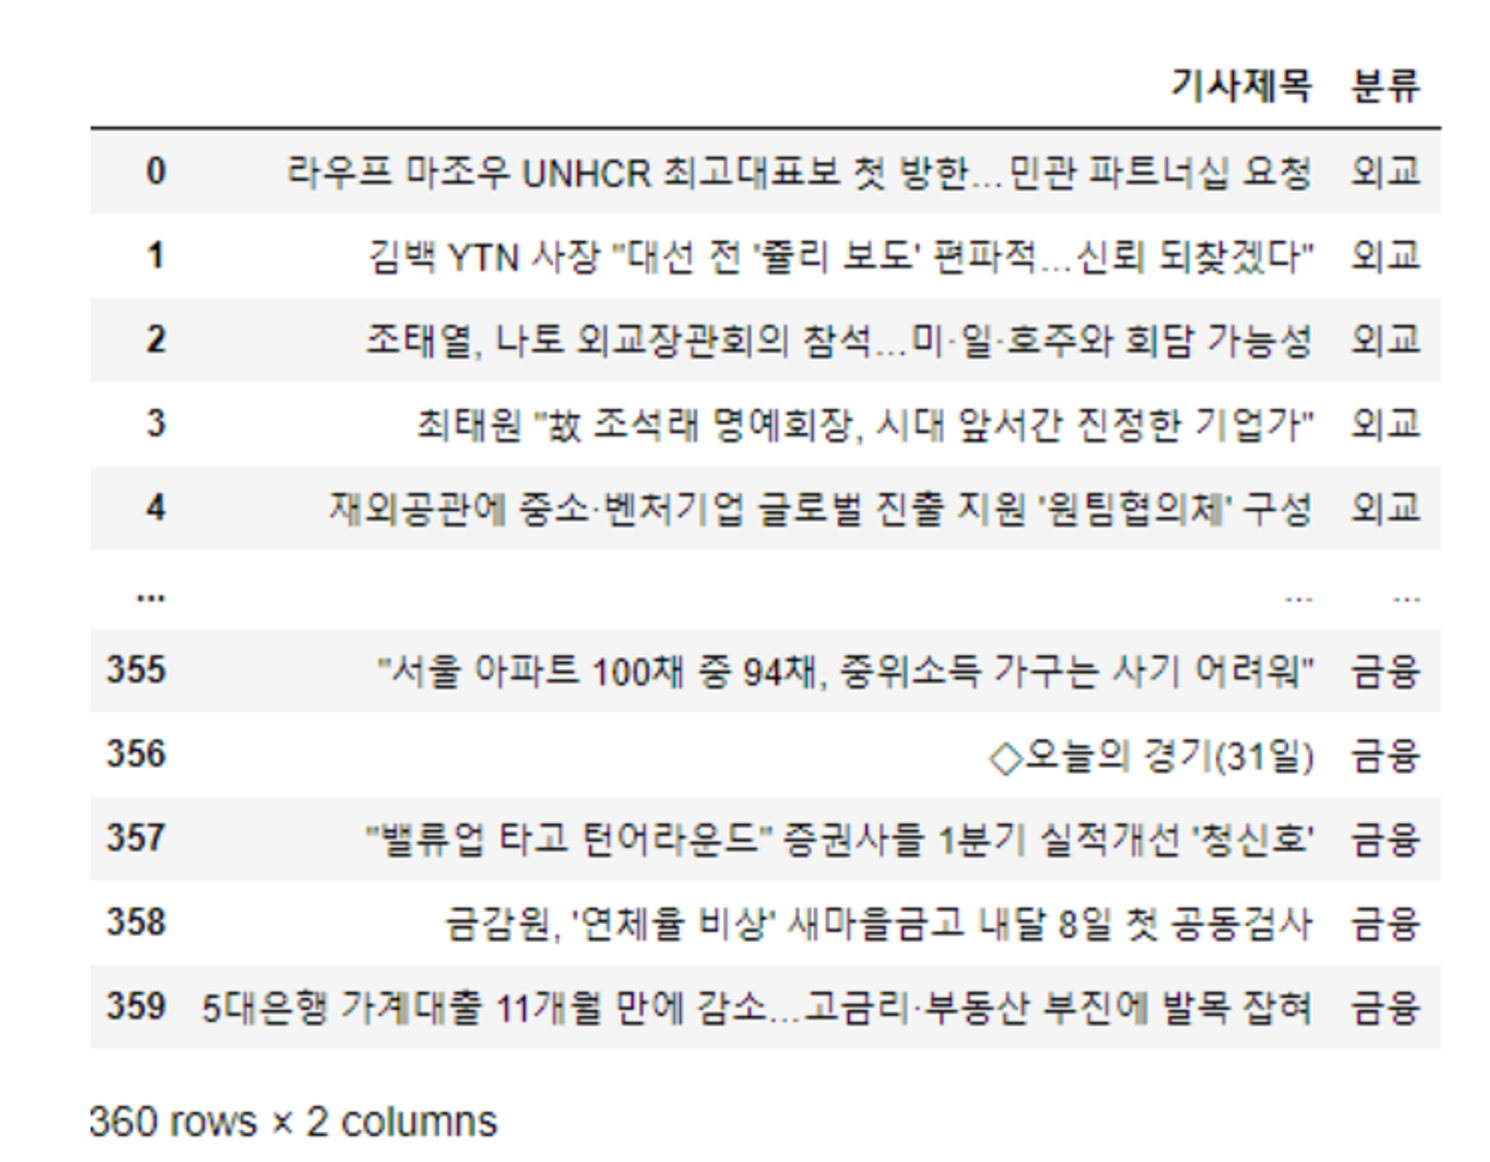

In [ ]:
# 외교에 해당하는 기사 수집

In [168]:
import requests
from bs4 import BeautifulSoup

In [169]:
def search_news(keyword):
    articles = []
    for page in range(1, 21):  # 20페이지까지
        url = f"https://search.hankyung.com/search/news?query={keyword}&page={page}"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        news_list = soup.find_all('em', class_='tit')
        for news in news_list:
            articles.append(news.text.strip())
    return articles

In [304]:
# '외교'에 해당하는 기사 수집
diplomacy_articles = search_news('외교')
# '경제'에 해당하는 기사 수집
economy_articles = search_news('경제')

In [305]:
# 분류 -> 외교 길이만큼 이어붙이고 경제(금융) 길이만큼 이어붙이기
df2 = pd.DataFrame({
    '기사제목': diplomacy_articles + economy_articles,
    '분류': ['외교'] * len(diplomacy_articles) + ['금융'] * len(economy_articles)
})

In [306]:
df2.head(3)

기사제목  분류
0  "한국인 마음속에 살다 간 일본인"…아사카와 다쿠미 양국 추모  외교
1     이란 영사관 타격에 '저항의 축' 발칵…중동 불씨 최고조  외교
2   北탄도미사일 발사에 한미일 북핵대표 협의…"긴밀 공조 지속"  외교

---

4. 추출된 기사 제목에 대해, 단어 표현 유사도 분석을 실시하여, '공습'과 연관성이 높은 단어들을 추출하시오. 

In [182]:
# extract_nouns 함수 활용
nouns_lists = [extract_nouns(title) for title in df['기사제목']]

In [183]:
nouns_lists

[['한국인', '마음속', '일본인', '아사카', '다쿠미', '양국', '추모'],
 ['이란', '영사관', '타격', '저항', '축', '발칵', '중동', '불씨', '최고'],
 ['탄도미사일', '발사', '한미', '북핵', '대표', '협의', '긴밀', '공조', '지속'],
 ['동포', '언론', '서울', '모국', '동포', '사회', '상생', '역할', '모색'],
 ['이스라엘', '시리아', '이란', '영사관', '공습', '이란', '보복', '예고'],
 ['인니', '대선', '승리', '프라', '시진핑', '국방', '협력', '핵심', '파트너'],
 ['또', '불법', '조업', '어선', '합동', '단속', '척', '나포', '척', '몰수'],
 ['지프', '나이', '최악', '실수', '도광양회', '폐기', '추월'],
 ['정부', '러시아', '선박', '기관', '개인', '독자', '제재', '북러', '협력', '정면', '겨냥', '종합'],
 ['불법', '중국', '어선', '또', '출몰', '척', '나포', '명', '구속'],
 ['회사', '나라', '생각', '조석래', '효성', '명예', '회장', '결식'],
 ['중동', '확전', '우려', '이란', '영사관', '폭격', '이스라엘', '보복', '공언'],
 ['정부', '북러', '무기', '거래', '노동자', '송출', '기관', '개인', '선박', '제재'],
 ['중소', '벤처기업', '해외진출', '날개', '코이카', '창', '진원', '기보'],
 ['노동당', '국제', '부장', '라오스', '방문', '종료', '개국', '순방', '마무리', '수순'],
 ['외국인', '건보', '무임', '승차', '방지', '내일', '입국', '개월뒤', '피부', '양자'],
 ['지난해', '나토', '정상', '회의', '참석', '국방부', '관리', '아바나', '증후군', '호소

In [184]:
model = Word2Vec(sentences=nouns_lists,
                window=5, min_count=1, sg=1)

In [186]:
model.wv.most_similar('공습')

[('집중', 0.34837645292282104),
 ('주택', 0.3267204761505127),
 ('경기', 0.32360130548477173),
 ('좌파', 0.3186415433883667),
 ('기대', 0.31697067618370056),
 ('병역', 0.2771134078502655),
 ('관리', 0.2753777801990509),
 ('뭐길', 0.26854684948921204),
 ('이제', 0.2628149390220642),
 ('상한', 0.25947052240371704)]

---

5. 앞서 수집한 데이터를 이용해, 기사 제목이 들어왔을 때, 해당 기사가 '외교'에 관련된 기사인지, '금융'관련 기사인지 분류하는 분류 모델을 구성하시오.
    1. Random Forest Ensemble 알고리즘과 RNN 알고리즘을 이용해 분류 모델 생성
    2. 두 개의 분류 모델에 대해, 성능을 비교하고, 가장 좋은 모델을 선택

In [307]:
df2['Target'] = df2['분류'].replace('외교',1).replace('금융',0)

In [308]:
X = df2['기사제목']
Y = df2['Target']

In [309]:
from sklearn.model_selection import train_test_split

In [310]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=1234)

In [292]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
# 사용자가 만든 함수를 Scikit learn 파이프라인 내에서 사용할 수 있도록 변환
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [311]:
# 자연어 처리 함수 구성 (Text2Seq/ Padding)
def text_preprocessing(X):
    text_to_seq = Tokenizer(num_words=10000)
    text_to_seq.fit_on_texts(X)
    sequence1 = text_to_seq.texts_to_sequences(X)
    return pad_sequences(sequence1, maxlen=30)

In [312]:
text_transformer = FunctionTransformer(text_preprocessing)
text_transformer

FunctionTransformer(func=<function text_preprocessing at 0x2ce0ca3e0>)

### Random Forest

In [313]:
from sklearn.ensemble import RandomForestClassifier

In [314]:
pipe_model = make_pipeline(text_transformer, MinMaxScaler(),
                           RandomForestClassifier())

In [315]:
hyperparameter = {'randomforestclassifier__n_estimators' : [50],
                  'randomforestclassifier__criterion':['gini','entropy'],
                  'randomforestclassifier__max_depth':range(1,10),
                  'randomforestclassifier__max_features':['auto', 3, 5],
                  'randomforestclassifier__class_weight':['balanced'] }

In [316]:
len(X_train)

280

In [317]:
len(Y_train)

280

In [318]:
grid_model = GridSearchCV(pipe_model, param_grid=hyperparameter,
                          cv=3, scoring='f1', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/pipeli

In [319]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

In [320]:
from sklearn.metrics import classification_report

In [321]:
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64       142
           1       0.64      0.93      0.76       138

    accuracy                           0.71       280
   macro avg       0.76      0.71      0.70       280
weighted avg       0.76      0.71      0.70       280

              precision    recall  f1-score   support

           0       0.68      0.45      0.54        58
           1       0.61      0.81      0.69        62

    accuracy                           0.63       120
   macro avg       0.65      0.63      0.62       120
weighted avg       0.65      0.63      0.62       120



# RNN

In [323]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [324]:
# 데이터 준비
X_train_pad = text_preprocessing(X_train)
X_test_pad = text_preprocessing(X_test)

In [337]:
# 모델 구성
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train_pad, Y_train,
                    epochs=20, batch_size=32,
                    validation_split=0.2)

# 모델 평가
results = model.evaluate(X_test_pad, Y_test)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - acc: 0.5132 - loss: 0.6949 - val_acc: 0.6429 - val_loss: 0.6558
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8743 - loss: 0.5958 - val_acc: 0.5357 - val_loss: 0.6271
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9207 - loss: 0.5019 - val_acc: 0.6429 - val_loss: 0.6035
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9816 - loss: 0.3576 - val_acc: 0.6429 - val_loss: 0.5969
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9975 - loss: 0.2427 - val_acc: 0.6429 - val_loss: 0.6047
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9989 - loss: 0.1598 - val_acc: 0.6786 - val_loss: 0.6159
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9941 - loss: 0.0940 - val_acc: 0.6429 - val_loss: 0.6732
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9963 - loss: 0.0787 - val_acc: 0.6071 - val_loss: 0.7212
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9982 - loss: 0.0613 - val_acc

In [338]:
Y_train_pred = model.predict(X_train_pad)
Y_test_pred = model.predict(X_test_pad)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [339]:
Y_train_pred_binary = (Y_train_pred > 0.5).astype(int)
Y_test_pred_binary = (Y_test_pred > 0.5).astype(int)

In [340]:
print(classification_report(Y_train, Y_train_pred_binary))
print(classification_report(Y_test, Y_test_pred_binary))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       142
           1       0.88      0.96      0.92       138

    accuracy                           0.91       280
   macro avg       0.92      0.91      0.91       280
weighted avg       0.92      0.91      0.91       280

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        58
           1       0.53      0.66      0.59        62

    accuracy                           0.52       120
   macro avg       0.51      0.51      0.50       120
weighted avg       0.51      0.52      0.51       120



---

6. '33_Data.xlsx' 데이터를 불러와, 생성한 모델에 넣어 '외교'와 '금융'항목을 분류하시오.

In [389]:
df = pd.read_excel('33_Data.xlsx')

In [390]:
df

Unnamed: 0                                               기사제목
0             0                 주 52시간 준법투쟁에 불꺼진 병동…수술실서 사라진 의대교수들
1             1                 반도체發 봄바람에 수출 훈풍 계속…'침체기 효자'였던 車수출↓
2             2                 [테샛 공부합시다] 日 가격 · 中 기술에도 쫓기는 산업경쟁력
3             3  끊임없이 디플레이션에 시달리는 중국 경제…시진핑 주석, 과연 해결책은 있나 [국제경...
4             4          뉴욕증시, 고용 지표·테슬라 1분기 출하량 주목 [출근전 꼭 글로벌브리핑]
..          ...                                                ...
675         675                IMF, '경제난' 파키스탄에 구제금융 7억달러 추가 지급 승인
676         676                   尹대통령 경제 행보에 매일 아침 '경제 스터디'하는 참모들
677         677                   IMF "올해 세계 경제 성장세 유지하지만 작년보다 둔화"
678         678                '집단학살'혐의 이스라엘 국제법정에…팔 감격 "그 자체로 승리"
679         679             조외교, 美국무와 첫 통화…"北대응·대만해협 평화 위해 협력"(종합)

[680 rows x 2 columns]

In [391]:
titles = df['기사제목'].tolist()

In [392]:
# 예측 결과를 저장할 리스트를 생성합니다.
predictions = []

# 각 기사 제목에 대해 모델을 이용하여 예측합니다.
for title in titles:
    input_data = pd.DataFrame(data=[title], columns=['기사제목'])
    prediction = best_model.predict(input_data)
    predictions.append(prediction)

In [393]:
predictions

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

---

7. 각 언론사의 외교/국방 관련한 기사들을 가져와 정보 기관에서 “불법항정신성의약품”의 유통과 국내 금융 지표 간 관계를 지속적으로 모니터링 할 수 있는 방안을 3가지를 데이터 분석 기법을 들어 제시하시오. 
    1. 서술 형식으로 작성 가능  
    2. 가능한 부분은 직접 분석해 표현 가능

In [394]:
# 1. 자연어 처리 이용
# -> 항정신성 의약품이 불법으로 사용된 사례들 찾아내 정보 수집
# 감성 분석? 수행 혹은 관련 있는 단어들 추출

In [ ]:
# 2. 회귀 분석 이용
# -> 항정신성 의약품의 유통과 금융 지표와의 관계 예측 위함
# 기사의 발행 빈도와 시장 지표 간의 상관관계 분석

In [ ]:
# 3. 위의 분석을 사용하여 대시보드 제작
# 모니터링 시스템 구축 가능

In [ ]:
# 자연어 처리 활용 예시

In [ ]:
import requests
from bs4 import BeautifulSoup

In [397]:
# 페이지 URL
url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EB%B6%88%EB%B2%95+%ED%95%AD%EC%A0%95%EC%8B%A0%EC%84%B1+%EC%9D%98%EC%95%BD%ED%92%88&oquery=%EB%B6%88%EB%B2%95%ED%95%AD%EC%A0%95%EC%8B%A0%EC%84%B1%EC%9D%98%EC%95%BD%ED%92%88&tqi=ilXUQwpzLiwssg9EX88ssssstsh-355101"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

elements = soup.find_all(class_="api_txt_lines dsc_txt_wrap")

# 추출된 요소 출력
for element in elements:
    print(element.text)

또 불법마약류까지는 아니지만, 항정신성의약품인 암페타민도 꾸준히 검출된 것으로 나타났다. 암페타민은 △2020년 15.46mg △2021년 5.13mg △2022년 4.43mg로 3년 평균 약 8.34로 나타났다. 이는 전국 평균 4.22mg보다 2배 가까이 높은 것이다. 다만 제주하수처리장에서는 △MDMA(엑스터시) △코카인 △LSD 등 다른...
지난해 의료용 마약류를 오남용하거나 불법으로 취급한 의료기관 등 149곳이 적발됐습니다. 식약처는 지난해 오남용과 불법 취급이 의심되는... 몇 가지 적발 사례를 보면 한 의원 의사는 1년간 환자 882명에게 항정신성의약품인 프로포폴 1만785개를 처방·투약하기도 했습니다. 또 다른 병원 의사는 약...
식품의약품안전처가 폐업 의료기관이 보유했던 마약류의약품 174만여 개의 사후관리를 방치해 이중 상당량이 불법 유통됐을 가능성이 있다고... 경북 포항시 소재 모 의원은 2020년 9월 폐업 하면서 재고로 있던 항정신성의약품 5만2000개를 자택으로 가져와 보관하던 중 2만7246개를 분실했다고 보고했다....
다만, 항정신성의약품, 한외마약 등 의약품 오·남용의 우려가 있는 의약품에 대해서는 예외로 규정하고 있다. 자치경찰이 적발한 불법 유통 의약품.[사진=제주자치경찰단] 2023.10.18 mmspress@newspim.com '의약분업 예외지역 약국'이란 의료기관이 개설돼 있지 않거나 의료기관 등이 1㎞ 이상 떨어져 있어 해당...
하정우는 항정신성의약품 프로포폴을 불법 투약한 혐의를 받는다. 그는 지난 달 1심 공판에서 혐의를 인정했고 검찰은 하정우에게 벌금 1000만 원을 구형했다. 하지만 오늘(14일) 1심 공판에서 재판부는 하정우에게 검찰 구형보다 더 높은 벌금 3000만원 형을 선고했다. 재판부는 “피고인(하정우)은 수면마취가...
이번 주부터 '항정신성 의약품' 프로포폴 불법 투약 혐의로 기소된 이재용 삼성전자 부회장의 재판이 시작됩니다. 서울중앙지법 형사11단독 장영채 판사는 모레(12일) 마약류관

In [399]:
text1 = element.text

In [401]:
nouns2 = extract_nouns(text1)

In [402]:
Counter(nouns2).most_common

<bound method Counter.most_common of Counter({'의약품': 2, '처방': 2, '권': 2, '대표': 2, '법인': 1, '카드': 1, '결제': 1, '의혹': 1, '절차': 1, '대리': 1, '그': 1, '과정': 1, '위법': 1, '불법행위': 1, '항': 1, '정신': 1, '보고': 1, '카카오': 1, '톡': 1, '메시지': 1, '내용': 1, '공개': 1, '씨': 1, '처방전': 1, '병원': 1, '곳': 1, '후크엔터테인먼트': 1})>

----